# Импортирование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

df=pd.read_csv('/content/drive/MyDrive/Project_chicago/Crime Prediction in Chicago_Dataset (1).csv')

#Анализ датасета до обработки

In [2]:
df.head(3)

ID Case Number             Date                   Block  IUCR  \
0  12592454    JF113025  1/14/2022 15:55       067XX S MORGAN ST  2826   
1  12785595    JF346553   8/5/2022 21:00  072XX S UNIVERSITY AVE  1544   
2  12808281    JF373517  8/14/2022 14:00     055XX W ARDMORE AVE  1562   

    Primary Type                       Description Location Description  \
0  OTHER OFFENSE    HARASSMENT BY ELECTRONIC MEANS            RESIDENCE   
1    SEX OFFENSE    SEXUAL EXPLOITATION OF A CHILD            APARTMENT   
2    SEX OFFENSE  AGGRAVATED CRIMINAL SEXUAL ABUSE            RESIDENCE   

   Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0   False      True  ...  16.0              68        26     1170805.0   
1    True     False  ...   5.0              69        17     1185135.0   
2   False     False  ...  39.0              11        17     1138383.0   

  Y Coordinate  Year       Updated On   Latitude  Longitude  \
0    1860170.0  2022  9/14/2023 15:41  41.771782 -87.649437   
1    1857211.0  2022  9/14/2023 15:41  41.763338 -87.597001   
2    1937953.0  2022  9/14/2023 15:41  41.985875 -87.766404   

                        Location  
0  (41.771782439, -87.649436929)  
1  (41.763337967, -87.597001131)  
2  (41.985875279, -87.766403857)  

[3 rows x 22 columns]

In [4]:
df.tail()

ID Case Number             Date                 Block IUCR  \
239553  27038    JF387886   9/8/2022 10:50  061XX N WINTHROP AVE  110   
239554  26819    JF275138  6/10/2022 23:41      018XX S CANAL ST  110   
239555  26601    JF132803   2/3/2022 16:27      000XX E 100TH PL  110   
239556  26857    JF290575   6/23/2022 2:25   027XX S KEDVALE AVE  110   
239557  27015    JF377220   8/31/2022 9:30  116XX S MICHIGAN AVE  110   

       Primary Type          Description Location Description  Arrest  \
239553     HOMICIDE  FIRST DEGREE MURDER                PORCH    True   
239554     HOMICIDE  FIRST DEGREE MURDER               STREET   False   
239555     HOMICIDE  FIRST DEGREE MURDER                 AUTO   False   
239556     HOMICIDE  FIRST DEGREE MURDER               STREET   False   
239557     HOMICIDE  FIRST DEGREE MURDER          GAS STATION   False   

        Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
239553     False  ...  48.0              77       01A     1167747.0   
239554     False  ...  25.0              31       01A     1173423.0   
239555     False  ...   9.0              49       01A     1178641.0   
239556     False  ...  22.0              30       01A     1149162.0   
239557     False  ...   9.0              53       01A     1178927.0   

       Y Coordinate  Year        Updated On   Latitude  Longitude  \
239553    1940929.0  2022  12/29/2022 15:40  41.993457 -87.658318   
239554    1891309.0  2022   9/19/2022 15:41  41.857173 -87.638918   
239555    1838358.0  2022   9/19/2022 15:41  41.711753 -87.621374   
239556    1885416.0  2022    9/1/2022 15:42  41.841506 -87.728122   
239557    1827627.0  2022   9/19/2022 15:41  41.682299 -87.620652   

                             Location  
239553  (41.993457327, -87.658318065)  
239554  (41.857173304, -87.638917814)  
239555  (41.711753121, -87.621374343)  
239556  (41.841506072, -87.728122297)  
239557  (41.682299252, -87.620652127)  

[5 rows x 22 columns]

In [3]:
df.shape

(239558, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [ ]:
df.describe()

ID           Beat      District           Ward  \
count  2.395580e+05  239558.000000  239558.00000  239548.000000   
mean   1.273144e+07    1154.023276      11.31053      23.385029   
std    7.082019e+05     707.909870       7.07555      14.210565   
min    2.654300e+04     111.000000       1.00000       1.000000   
25%    1.267802e+07     533.000000       5.00000       9.000000   
50%    1.276893e+07    1033.000000      10.00000      24.000000   
75%    1.285704e+07    1731.000000      17.00000      35.000000   
max    1.363051e+07    2535.000000      31.00000      50.000000   

       Community Area  X Coordinate  Y Coordinate      Year       Latitude  \
count   239558.000000  2.348910e+05  2.348910e+05  239558.0  234891.000000   
mean        36.268474  1.165381e+06  1.887038e+06    2022.0      41.845612   
std         21.553814  1.679375e+04  3.229564e+04       0.0       0.088833   
min          1.000000  0.000000e+00  0.000000e+00    2022.0      36.619446   
25%         22.000000  1.153949e+06  1.859284e+06    2022.0      41.769168   
50%         32.000000  1.167256e+06  1.893383e+06    2022.0      41.863073   
75%         53.000000  1.176856e+06  1.910066e+06    2022.0      41.909023   
max         77.000000  1.205119e+06  1.951493e+06    2022.0      42.022548   

           Longitude  
count  234891.000000  
mean      -87.668599  
std         0.061010  
min       -91.686566  
25%       -87.710150  
50%       -87.661465  
75%       -87.626402  
max       -87.524532

Пропуски (NaNs):

In [ ]:
nuls = df.isnull().sum()
print(nuls)

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64


Дубликаты:

In [ ]:
df.duplicated().sum()

0

# Обработка датасета (работа с пропусками)

Разделение даты на временные промежутки:

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour

In [18]:
def set_daytime(hour):
  if 23 <= hour or hour < 5:
    return 'Night'
  elif 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  else:
    return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(set_daytime)

Заполнение пропусков модой (для категориальных данных) или средним/медианным значением (для числовых данных):

In [ ]:
df['Location Description'].fillna(df['Location Description'].mode()[0],inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(),inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(),inplace=True)
df['Ward'].fillna(df['Ward'].mean(),inplace=True)
df['X Coordinate'].fillna(df['X Coordinate'].mean(),inplace=True)
df['Y Coordinate'].fillna(df['Y Coordinate'].mean(),inplace=True)

<ipython-input-200-3a1c996d860b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location Description'].fillna(df['Location Description'].mode()[0],inplace=True)
<ipython-input-200-3a1c996d860b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

# Продолжение анализа после обработки

In [13]:
df['Primary Type'].value_counts().reset_index()

Primary Type  count
0                               THEFT  54886
1                             BATTERY  40946
2                     CRIMINAL DAMAGE  27248
3                 MOTOR VEHICLE THEFT  21463
4                             ASSAULT  20809
5                  DECEPTIVE PRACTICE  16854
6                       OTHER OFFENSE  14609
7                             ROBBERY   8963
8                   WEAPONS VIOLATION   8780
9                            BURGLARY   7593
10                          NARCOTICS   4756
11                  CRIMINAL TRESPASS   4223
12         OFFENSE INVOLVING CHILDREN   1870
13            CRIMINAL SEXUAL ASSAULT   1583
14                        SEX OFFENSE   1216
15                           HOMICIDE    732
16             PUBLIC PEACE VIOLATION    711
17                           STALKING    452
18                              ARSON    422
19   INTERFERENCE WITH PUBLIC OFFICER    392
20                       PROSTITUTION    283
21               LIQUOR LAW VIOLATION    203
22                       INTIMIDATION    184
23  CONCEALED CARRY LICENSE VIOLATION    177
24                         KIDNAPPING    117
25                          OBSCENITY     47
26                  HUMAN TRAFFICKING     13
27                           GAMBLING      9
28           OTHER NARCOTIC VIOLATION      7
29                       NON-CRIMINAL      5
30                   PUBLIC INDECENCY      5

In [14]:
arrest_ratio_value = df['Arrest'].sum() / df.shape[0] * 100
print(f'{round(arrest_ratio_value, 2)}% преступников поймано')

11.71% преступников поймано


Предположение о том, что для преступлений совершенных ночью арестов меньше (из-за плохой видимости или др. факторов):

In [15]:
arrest_by_time = df.groupby('Time_of_Day')['Arrest'].mean() * 100
print(arrest_by_time)

Time_of_Day
Afternoon    11.488789
Evening      13.983123
Morning      10.536824
Night        10.182332
Name: Arrest, dtype: float64


Соотношение количества каждого преступления ко всем преступлениям:

In [16]:
crime_ratio = df['Primary Type'].value_counts() / df.shape[0] * 100
print(round(crime_ratio,2))

Primary Type
THEFT                                22.91
BATTERY                              17.09
CRIMINAL DAMAGE                      11.37
MOTOR VEHICLE THEFT                   8.96
ASSAULT                               8.69
DECEPTIVE PRACTICE                    7.04
OTHER OFFENSE                         6.10
ROBBERY                               3.74
WEAPONS VIOLATION                     3.67
BURGLARY                              3.17
NARCOTICS                             1.99
CRIMINAL TRESPASS                     1.76
OFFENSE INVOLVING CHILDREN            0.78
CRIMINAL SEXUAL ASSAULT               0.66
SEX OFFENSE                           0.51
HOMICIDE                              0.31
PUBLIC PEACE VIOLATION                0.30
STALKING                              0.19
ARSON                                 0.18
INTERFERENCE WITH PUBLIC OFFICER      0.16
PROSTITUTION                          0.12
LIQUOR LAW VIOLATION                  0.08
INTIMIDATION                          0.0

Самые криминальные районы патрулирования по количеству преступлений:

In [17]:
beat_distribution = df['Beat'].value_counts().head(10)
beat_distribution

Beat
1834    3115
123     2131
421     2076
1831    1908
423     1768
511     1762
624     1698
631     1686
1214    1587
414     1564
Name: count, dtype: int64

# Построение ящика с усами для числовых переменных, анализ выбросов и их удаление

На этих графиках явно видны выбросы для таких переменных, как координаты. Это точки, которые лежат далеко за пределами "усов" ящика. Они не представляют какой-либо важности и их мы попросту можем заменить.

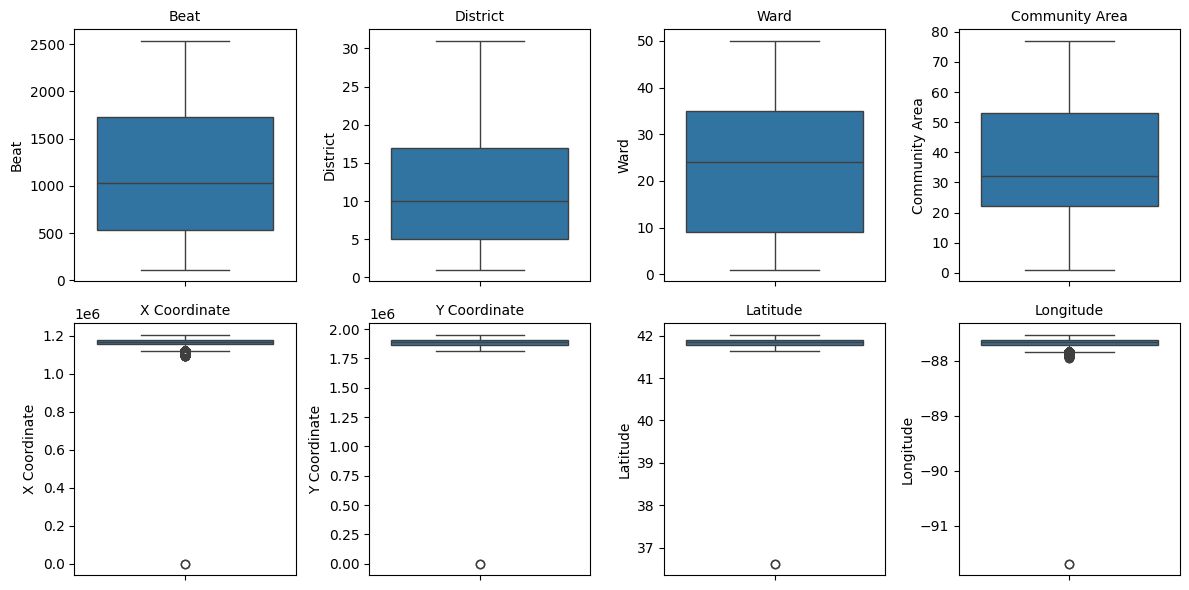

In [ ]:
num_cols=df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).select_dtypes(include=['number'])
fig,ax = plt.subplots(2,4,figsize=(12,6))
ax = ax.flatten()

for i,col in enumerate(num_cols):
  sns.boxplot(df,y=col,ax=ax[i],showfliers=True)
  ax[i].set_title(col,fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df[df['X Coordinate']==0.0]

ID Case Number                Date                  Block  IUCR  \
211883  12848210    JF420062 2022-10-02 19:00:00  001XX W CONGRESS PKWY   320   
216938  12852880    JF425857 2022-10-07 15:55:00  0000X E CONGRESS PKWY  1150   

              Primary Type             Description Location Description  \
211883             ROBBERY  STRONG ARM - NO WEAPON            CTA TRAIN   
216938  DECEPTIVE PRACTICE       CREDIT CARD FRAUD        HOTEL / MOTEL   

        Arrest  Domestic  ...  X Coordinate  Y Coordinate  Year  \
211883   False     False  ...           0.0           0.0  2022   
216938   False     False  ...           0.0           0.0  2022   

              Updated On   Latitude  Longitude                       Location  \
211883   10/9/2022 15:42  36.619446 -91.686566  (36.619446395, -91.686565684)   
216938  10/14/2022 15:41  36.619446 -91.686566  (36.619446395, -91.686565684)   

        Month Day  Day of Week  
211883     10   2            6  
216938     10   7            4  

[2 rows x 25 columns]

In [ ]:
df['Longitude'].sort_values(ascending=True).head(5)

216938   -91.686566
211883   -91.686566
29225    -87.939733
30212    -87.939733
210998   -87.927882
Name: Longitude, dtype: float64

Как мы видим, всего две строки в нашем датасете отличаются от остальных, с ними и будем работать.

In [ ]:
Q1 = df['X Coordinate'].quantile(0.25)
Q3 = df['X Coordinate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['X Coordinate'] = np.where(df['X Coordinate'] < lower_bound, lower_bound, df['X Coordinate'])
df['X Coordinate'] = np.where(df['X Coordinate'] > upper_bound, upper_bound, df['X Coordinate'])

Q1 = df['Y Coordinate'].quantile(0.25)
Q3 = df['Y Coordinate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Y Coordinate'] = np.where(df['Y Coordinate'] < lower_bound, lower_bound, df['Y Coordinate'])
df['Y Coordinate'] = np.where(df['Y Coordinate'] > upper_bound, upper_bound, df['Y Coordinate'])

In [ ]:
Q1 = df['Longitude'].quantile(0.25)
Q3 = df['Longitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Longitude'] = np.where(df['Longitude'] < lower_bound, lower_bound, df['Longitude'])
df['Longitude'] = np.where(df['Longitude'] > upper_bound, upper_bound, df['Longitude'])

Q1 = df['Latitude'].quantile(0.25)
Q3 = df['Latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Latitude'] = np.where(df['Latitude'] < lower_bound, lower_bound, df['Latitude'])
df['Latitude'] = np.where(df['Latitude'] > upper_bound, upper_bound, df['Latitude'])

В конечном итоге мы смогли избавиться от выбросов в данных, которые могли помешать нам при дальнейшем анализе.

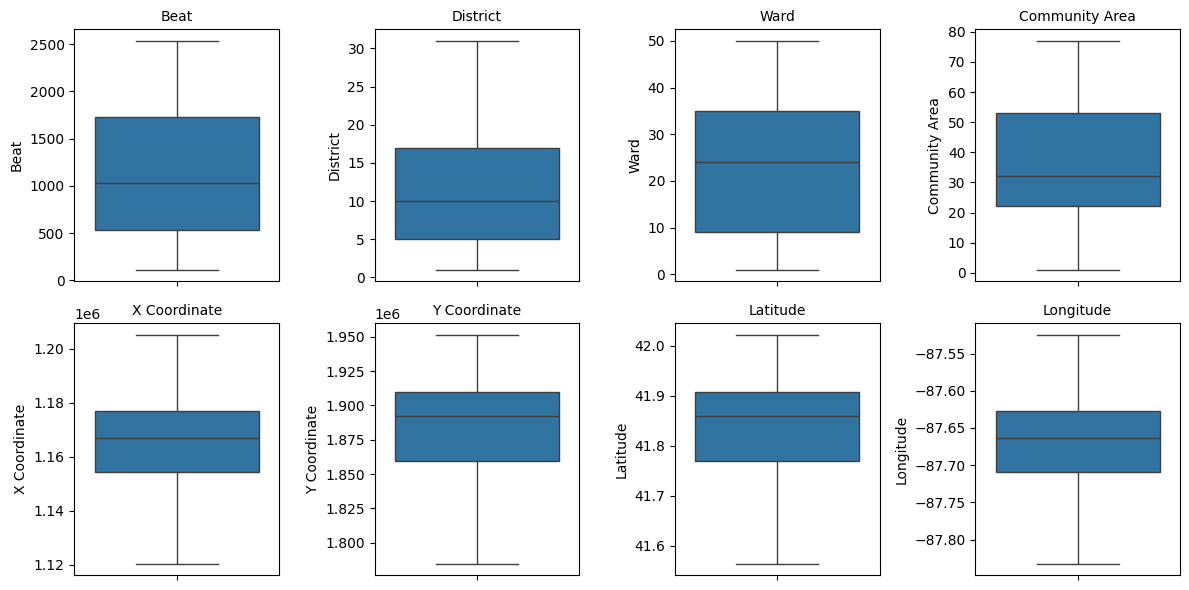

In [ ]:
num_cols=df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).select_dtypes(include=['number'])
fig,ax = plt.subplots(2,4,figsize=(12,6))
ax = ax.flatten()

for i,col in enumerate(num_cols):
  sns.boxplot(df,y=col,ax=ax[i])
  ax[i].set_title(col,fontsize=10)

plt.tight_layout()
plt.show()

Теперь, когда мы избавились от выбросов в данных, можно перейти к анализу. Переменные Beat, District, Ward и Community Area, соответствующие конкретным районам местности, указывают на равномерное распределение преступности. Как говорилось ранее видно, что графики X Coordinate и Longitude являются идентичными, такая же свзяь у переменных Y Coordinate и Latitude.

# Построение матрицы корреляций для числовых переменных

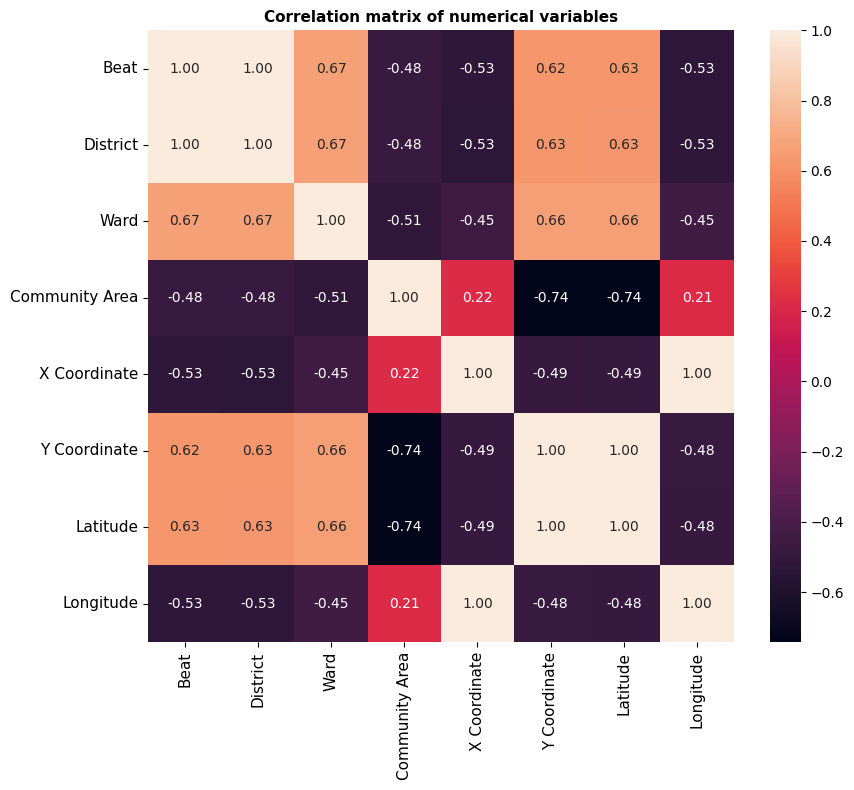

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).corr(numeric_only = True), annot=True, fmt='.2f')
plt.title('Correlation matrix of numerical variables', fontsize=11,fontweight='bold')
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

Переменные Beat, District и Ward  имеют положительную корреляцию между собой (от 0.67 до 1). Почему же это так? Скорее всего преступления определенных типов совершаются в конкретных районах местности, за что и отвечают эти три переменные. Координаты по X и Y полностью коррелируют с широтой и долготой, что правда, ведь по сути они одно и то же. В приниципе, мы можем избавиться от колонок с широтой и долготой, для построения карты будем пользоваться переменными X Coordinate, Y Coordinate. Community Area показывает отрицательные корреляции с большинством параметров, что может свидетельствовать о противоположных тенденциях в распределении данных.

Также рассмотрим корреляцию числовых переменных с целевой переменной "Arrest":

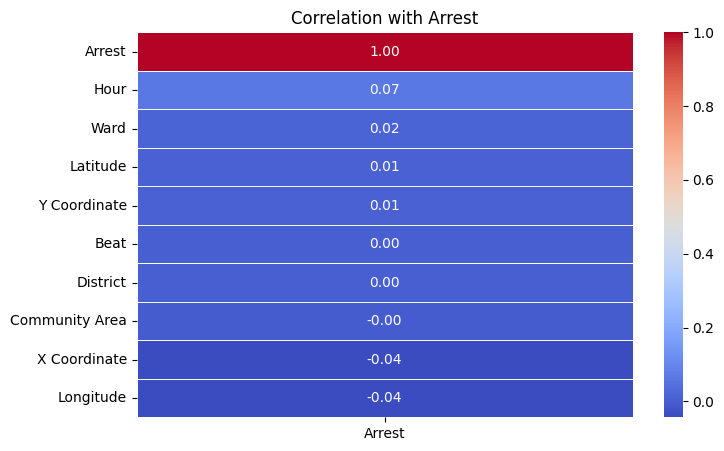

In [61]:
df_numeric = df.drop(columns=['ID','Year', 'Domestic','Date','Day of Week','Month','Day'])
correlation_matrix = df_numeric.corr(numeric_only=True)
correlation_arrest = correlation_matrix['Arrest'].sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_arrest.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Arrest')
plt.show()

Корреляция между фактом ареста и другими переменными (такими как географические данные, тип преступления и год) крайне слабая или отсутствует. Это указывает на то, что решение об аресте, вероятно, зависит от других факторов, не учтённых в данном анализе.

# EDA

Построение распределения количества преступлений по факту ареста (не арестован / арестован):

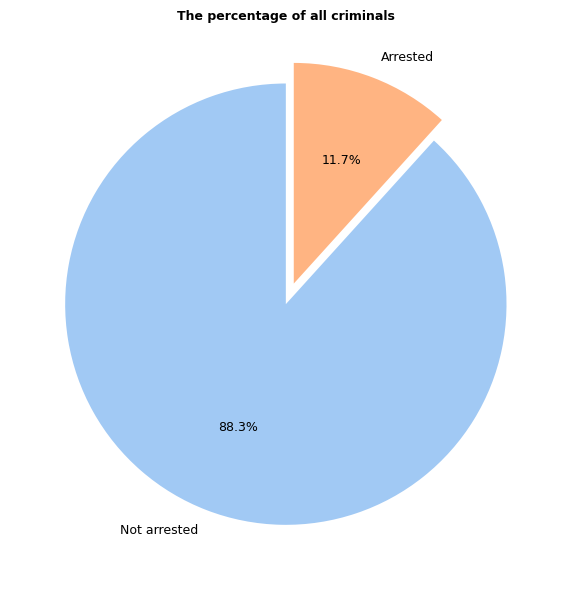

In [ ]:
plt.figure(figsize=(12, 6))
plt.pie(df['Arrest'].value_counts(),labels=['Not arrested','Arrested'],colors=sns.color_palette('pastel')[0:2],autopct='%1.1f%%',startangle=90, textprops={'fontsize':9}, explode=[0,0.1])
plt.title('The percentage of all criminals',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

Анализируя данную диаграмму, можно задаться вопросом: почему же всего 11.7% из всех преступников были задержаны, а остальные нет. Вполне вероятно, что это может зависить от категории совершенного преступления, района, в котором подразумевается работа определенных полицейских подразделений, и множества других факторов, которые мы рассмотрим ниже.

График наличия связи преступлений с домашним насилием по факту ареста (не арестован / арестован):

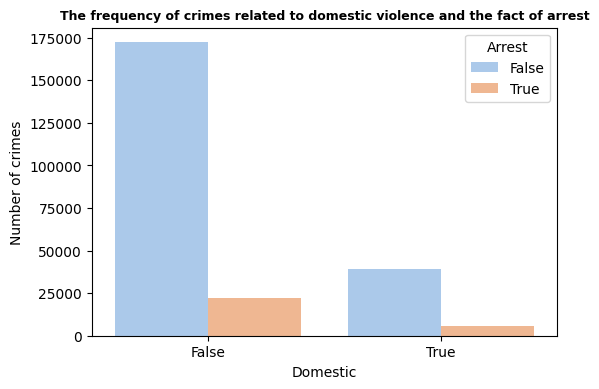

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Domestic', hue='Arrest', palette='pastel')
plt.title('The frequency of crimes related to domestic violence and the fact of arrest',fontsize=9,fontweight='bold')
plt.ylabel('Number of crimes')
plt.show()

Из графика видно, что количество случаев, которые не являются домашними преступлениями (False), значительно превышает количество случаев, которые классифицируются как домашние преступления. Это может указывать на то, что большинство рассматриваемых инцидентов не связаны с домашним насилием или другими преступлениями в семейно-бытовой сфере.

Такой дисбаланс может быть связан с особенностями выборки данных или с тем, что домашние преступления составляют меньшую долю от общего числа рассматриваемых случаев.

График распределения преступлений по полицейским участкам по факту ареста (не арестован / арестован):

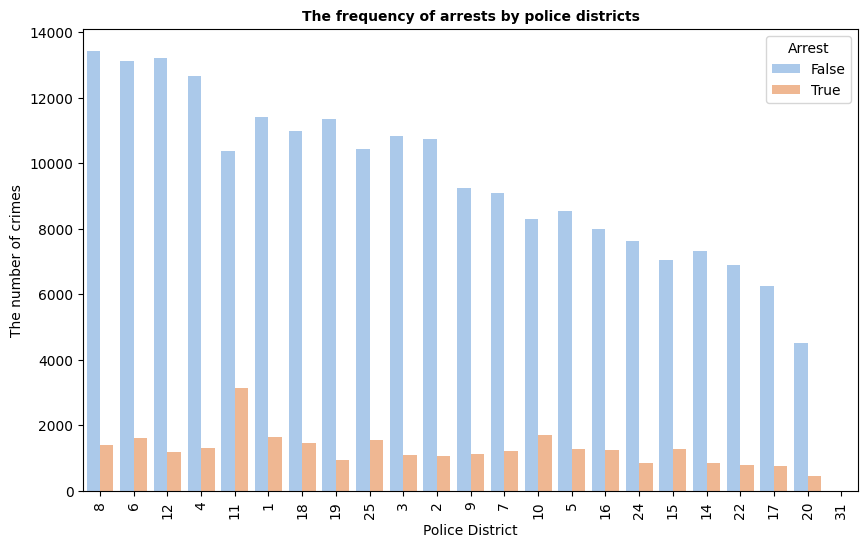

In [75]:
district_counts = df['District'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='District', hue='Arrest', palette='pastel', order=district_counts.index)
plt.title('The frequency of arrests by police districts',fontsize=10,fontweight='bold')
plt.xlabel('Police District')
plt.ylabel('The number of crimes')
plt.xticks(rotation=90)
plt.show()

График демонстрирует, что количество арестов (Arrest: True) варьируется в зависимости от полицейского округа, причем в некоторых округах, таких как 8 и 6, наблюдается значительно больше арестов, чем в других.

График распределения преступлений по конкретным участкам полицейского патрулирования:

<ipython-input-90-1e9bc9ba1e07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_beats.index, y=top_beats.values, palette="pastel", ax=ax, order=top_beats.index)
<ipython-input-90-1e9bc9ba1e07>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_beats.index, rotation=45)


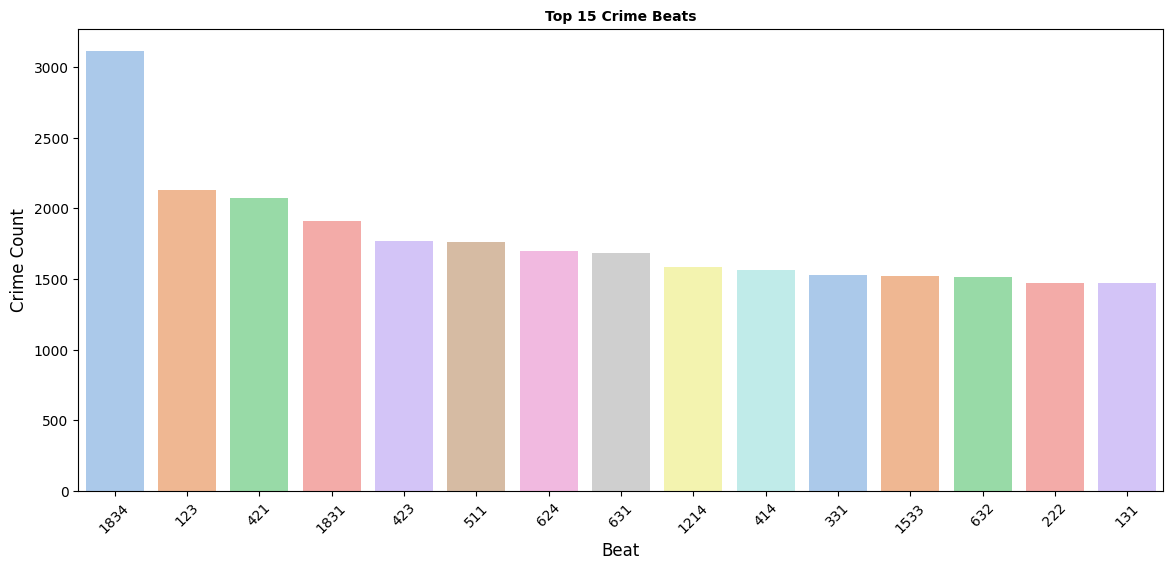

In [90]:
top_beats = df["Beat"].value_counts().nlargest(15)
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=top_beats.index, y=top_beats.values, palette="pastel", ax=ax, order=top_beats.index)
ax.set_title("Top 15 Crime Beats", fontsize=10, fontweight='bold')
ax.set_xlabel("Beat", fontsize=12)
ax.set_ylabel("Crime Count", fontsize=12)
ax.set_xticklabels(top_beats.index, rotation=45)
plt.show()

Один или несколько районов выделяются значительным числом инцидентов (около 2000 и более), что указывает на их высокую криминальную активность. Остальные районы демонстрируют постепенное снижение числа преступлений. Это позволяет выделить проблемные зоны, требующие повышенного внимания правоохранительных органов для улучшения ситуации.

График влияния типа преступления на задержание преступника по факту ареста (не арестован / арестован):

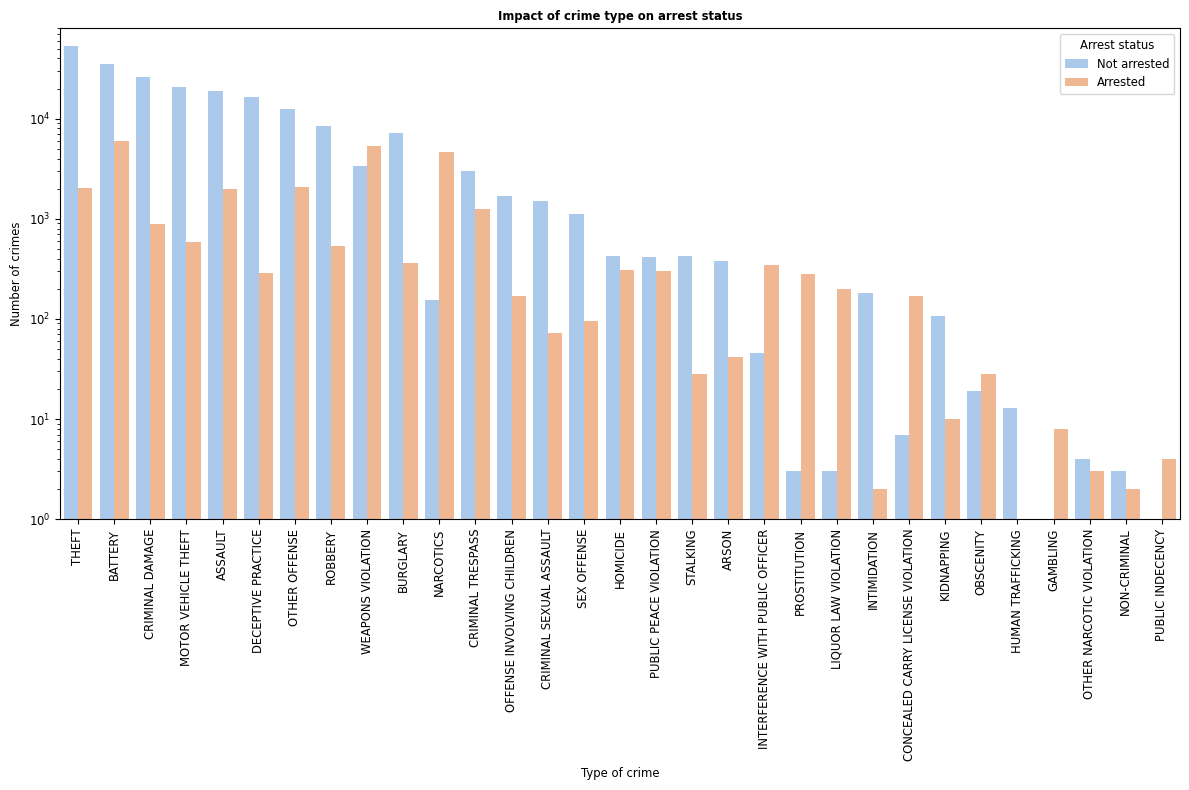

In [ ]:
count_data = df.groupby(['Primary Type', 'Arrest']).size().reset_index(name='Count')
sorted_types = count_data.groupby('Primary Type')['Count'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12,8))
sns.countplot(x='Primary Type', hue='Arrest', data=df, palette='pastel', order=sorted_types)
plt.title('Impact of crime type on arrest status', fontsize='small', fontweight='bold')
plt.xlabel('Type of сrime', fontsize='small')
plt.ylabel('Number of сrimes', fontsize='small')
plt.xticks(rotation=90)
plt.tick_params(labelsize='small')
plt.ylim(1,80000)
plt.yscale('log')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

Для большинства категорий преступления количество не арестованных меньше. Правоохранительные органы могут сосредотачивать свои ресурсы на конкретных типах преступлений в зависимости от приоритетов. Можно заметить что кража (THEFT) является наиболее частым преступлением, но при этом количество не арестованных является наибольшим. Почему же больше всего арестованных при избеении (BATTERY) или нарушении обращения с оружием (WEAPONS VIOLATION)? Вероятно, полиция уделяет больше внимания преступлениям, свазанным непосредственно с опасностью для граждан.

График распределения преступлений по политическим районам:

<ipython-input-83-9ce34b1268f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


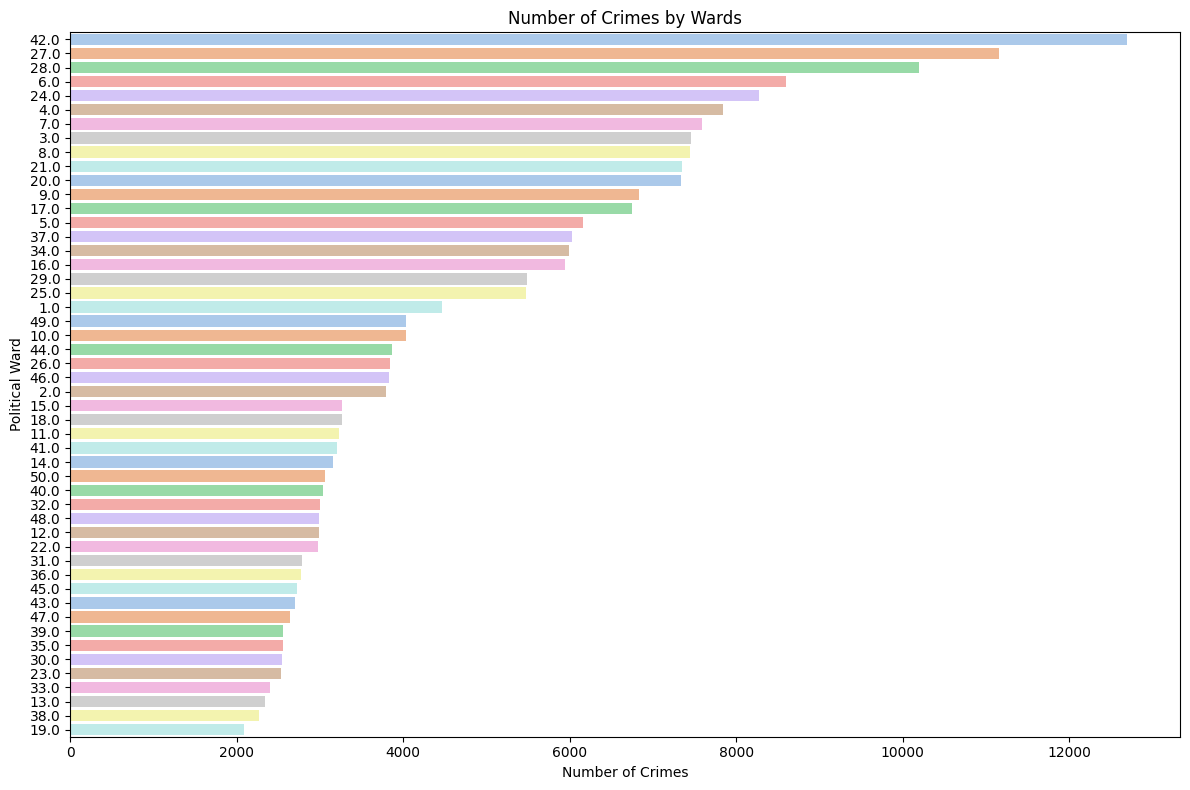

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(
    data=df,
    y='Ward',
    palette='pastel',
    order=df['Ward'].value_counts().index
)

plt.title('Number of Crimes by Wards')
plt.xlabel('Number of Crimes')
plt.ylabel('Political Ward')
plt.tight_layout()
plt.show()

График показывает количество преступлений по политическим округам, где каждый округ обозначен числом. Наиболее высокие показатели преступлений наблюдаются в округах с номерами 42, 27 и 28, что может быть связано с более высокой плотностью населения, социально-экономическими проблемами или другими местными факторами.

График распределения совершенных преступлений по месяцам (с фактом ареста):

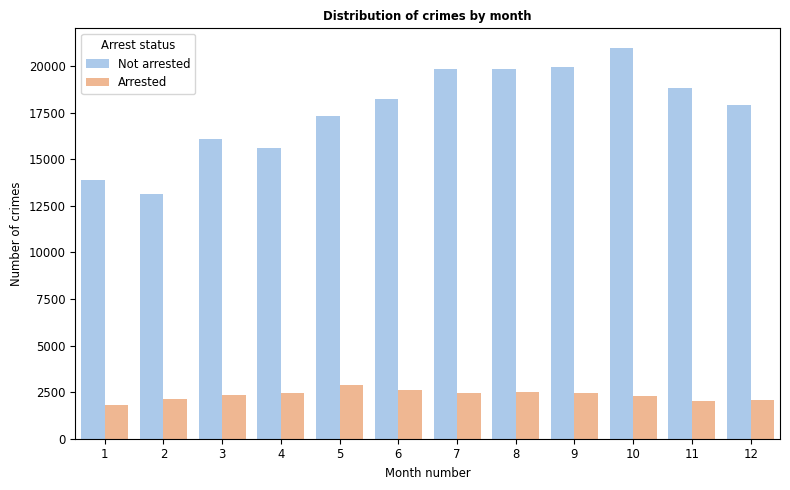

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Month'], hue=df['Arrest'], palette='pastel')
plt.title('Distribution of crimes by month',fontsize='small',fontweight='bold')
plt.xlabel('Month number',fontsize='small')
plt.ylabel('Number of crimes',fontsize='small')
plt.tick_params(labelsize='small')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

Почему же в январе и феврале наблюдается меньше всего преступлений по сравнению с остальными месяцами? Это связано с тем, что в посленовогоднее время наблюдается меньшая активность людей на улицах, т.е. снижение социальной активности, соответственно меньше преступлений. Также это может быть связано с похолоданием в зимнее время.

График распределения совершенных преступлений по дням недели (с фактом ареста):

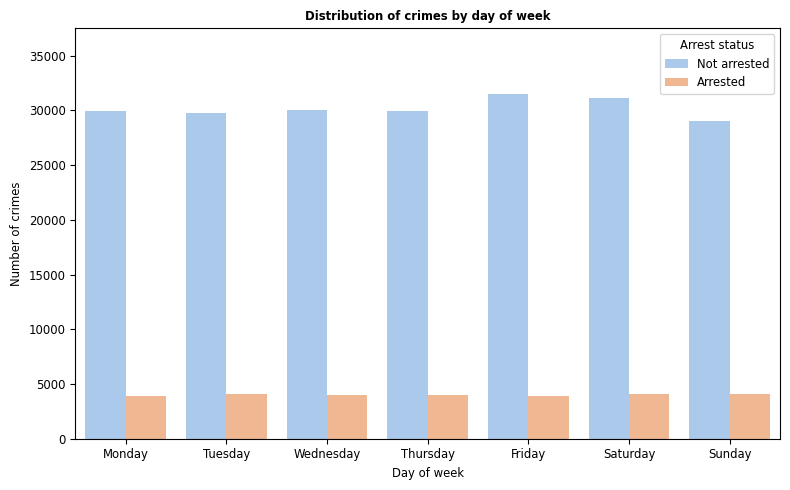

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Day of Week'], hue=df['Arrest'], palette='pastel')
plt.title('Distribution of crimes by day of week',fontsize='small',fontweight='bold')
plt.xlabel('Day of week',fontsize='small')
plt.ylabel('Number of crimes',fontsize='small')
plt.ylim(0,37500)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks=range(len(days)), labels=days)
plt.tick_params(labelsize='small')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

Хотя распределение в основном равномерное, видно, что в пятницу и субботу уровень преступности немного выше, чем в другие дни недели. Это может быть связано с высокой активностью людей в общественных местах в эти дни. Увеличение количества людей на улицах создает больше возможностей для преступлений, таких как карманные кражи, грабежи и нападения.

График распределения совершенных преступлений по часам (с фактом ареста):

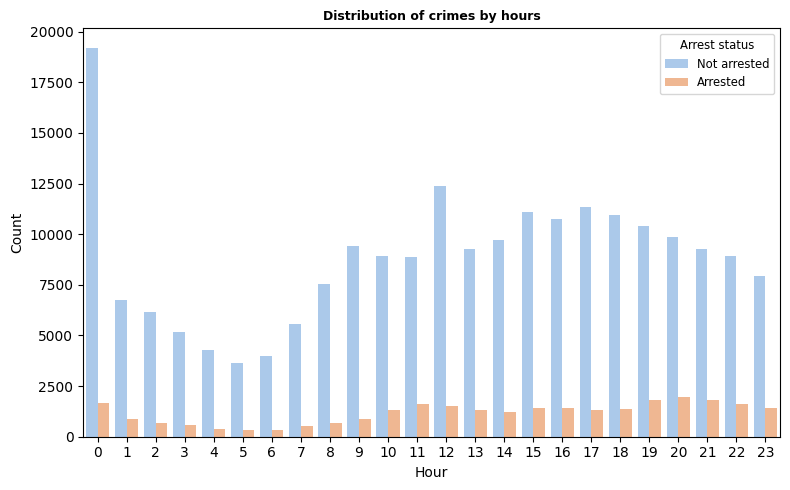

In [48]:
df['Hour'] = df['Date'].dt.hour
plt.figure(figsize=(8,5))
sns.countplot(x='Hour',hue='Arrest', data=df, palette='pastel').set_title('Distribution of crimes by hours',fontsize=9,fontweight='bold')
plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

В полночь наблюдается высокая активность преступников, возможными причининами которой может быть большее количество людей, выходящих из баров и клубов, сниженную видимость и повышенную вероятность употребления алкоголя и наркотиков. Каковы могут быть возможные причины низкого уровня арестов в целом (по сравнению с преступлениями, которые не приводят к арестам)? Скорее всего, правоохранительные органы могут расставлять приоритеты для более серьезных преступлений.

График распределения совершенных преступлений по времени суток:

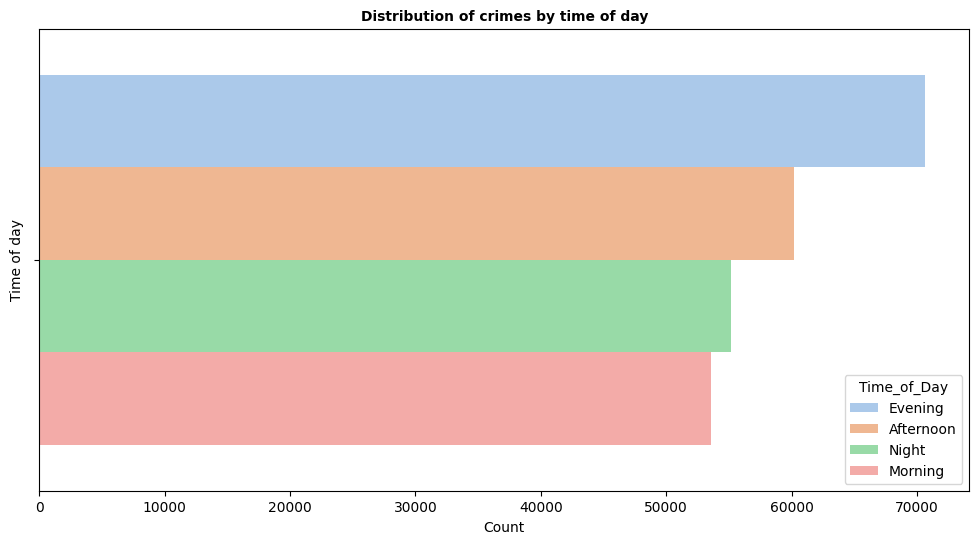

In [50]:
time_of_day_top = df['Time_of_Day'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=time_of_day_top.values, hue=time_of_day_top.index, palette='pastel').set_title('Distribution of crimes by time of day',fontsize=10,fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Time of day')
plt.show()

Что может способствовать большому количеству преступлений в вечернее время? Обычно в это время на улицах и в барах/ресторанах больше людей, что создает множество причин для совершения преступлений в вечерние часы.

График распределения наиболее часто встречающихся описаний преступлений:

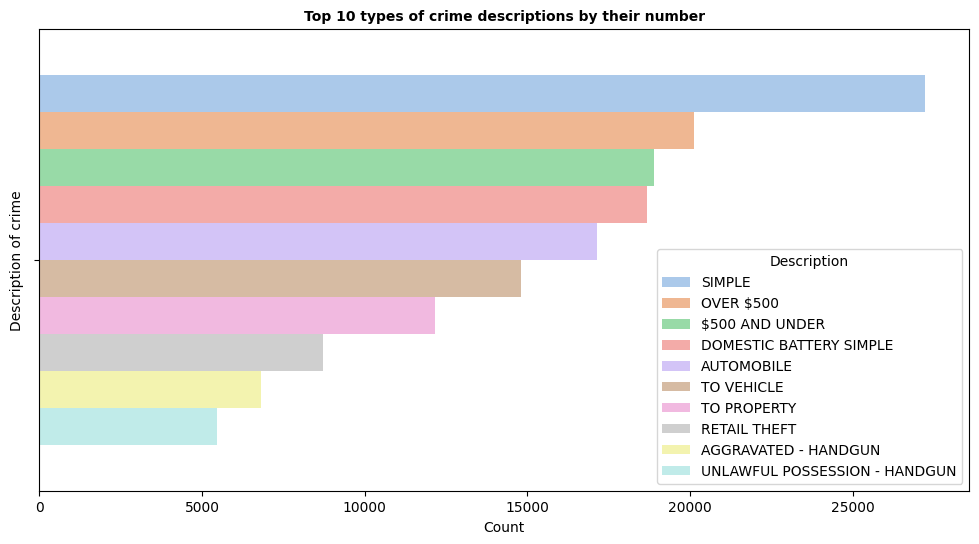

In [63]:
description_top = df['Description'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=description_top.values, hue=description_top.index, palette='pastel').set_title('Top 10 types of crime descriptions by their number',fontsize=10,fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Description of crime')
plt.show()

Самым распространенным описанием преступления является "ПРОСТОЙ" ("SIMPLE"). Можем ли мы утверждать, что преступления с применением огнестрельного оружия являются редкостью на основе этого графика? Только два преступления из ТОП-10 связаны с огнестрельным оружием, с не очень большим количеством зарегистрированных случаев.

Распределение категорий мест, где были совершены преступления (с фактом ареста):

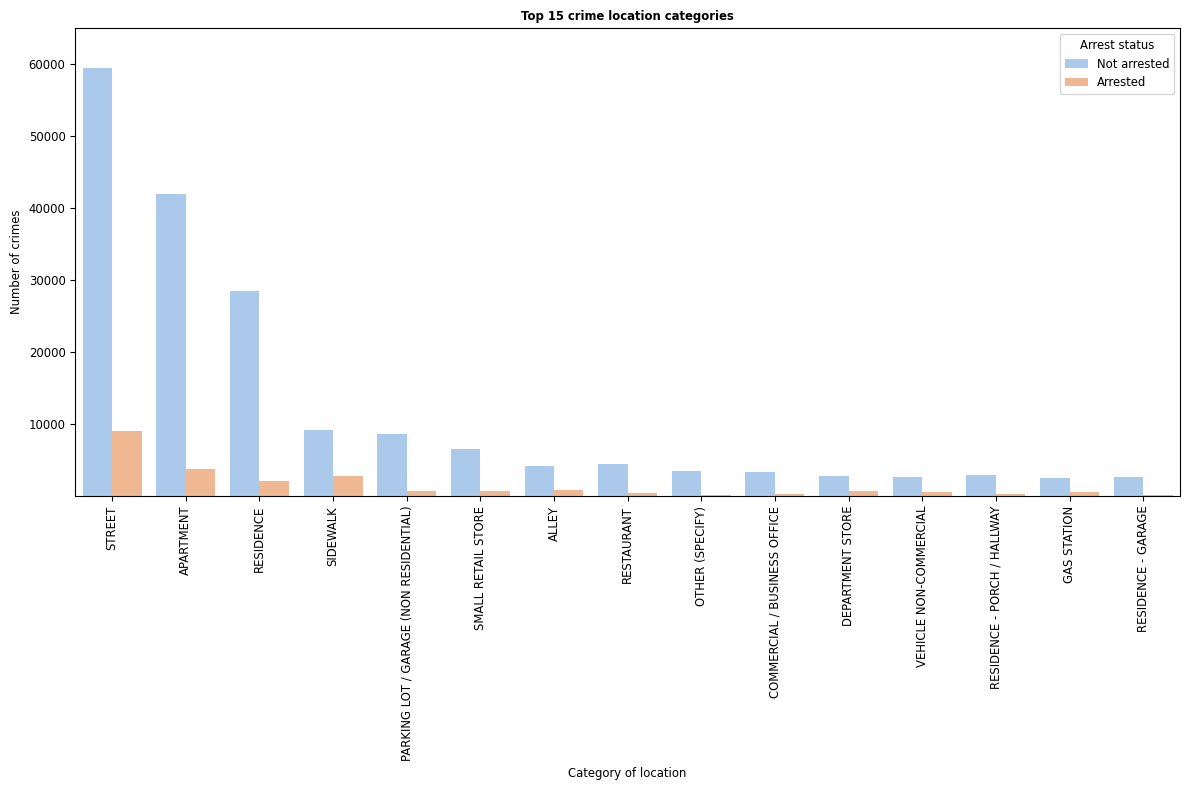

In [ ]:
top_loc = df['Location Description'].value_counts().head(15).index
top_lc = df[df['Location Description'].isin(top_loc)]
sorted_counts = top_lc.groupby('Location Description').size().reset_index(name='Count')
sorted_counts = sorted_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,8))
sns.countplot(x='Location Description', hue='Arrest',data=top_lc, palette='pastel',order=sorted_counts['Location Description'])
plt.title('Top 15 crime location categories',fontsize='small',fontweight='bold')
plt.xlabel('Category of location',fontsize='small')
plt.ylabel('Number of crimes',fontsize='small')
plt.xticks(rotation=90)
plt.ylim(1,65000)
plt.tick_params(labelsize='small')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

На графике видно, что самыми популярными местами для преступлений являются: улица, апартаменты и другие виды жилья. Это, возможно, связано с тем, что это места, где люди проводят большую часть времени, что делает их легко доступными для преступников, а также на улицах и в жилых зонах сложнее обеспечить постоянный контроль, чем в торговых центрах или офисных зданиях.

# Использование folium для анализа преступности на карте

Все преступления в Чикаго, т.е. задержанные/не задержанные вместе:

In [53]:
df_folium = df.dropna(subset=['Latitude', 'Longitude']) #поскольку есть преступления без локации

m = folium.Map(location = (41.771782439, -87.649436929)) #по первой точке

df_folium = df_folium.sample(5000)

for x, y in zip(df_folium['Latitude'], df_folium['Longitude']):
  folium.CircleMarker(location=[x,y], color='red', radius=2, fill=True, fill_color='red').add_to(m)

m.save('/content/chicago_map.html')
m

Построение тепловой карты для преступлений в Чикаго:

In [54]:
from folium.plugins import HeatMap

m_heatmap = folium.Map(location = (41.771782439, -87.649436929)) #по первой точке

heat_data = list(zip(df_folium['Latitude'], df_folium['Longitude']))
HeatMap(heat_data[:5000], blur=20, radius=15).add_to(m_heatmap)

m_heatmap.save('/content/chicago_heatmap.html')
m_heatmap

На карте видно, что в одном из центральных районов Чикаго преступления происходят чаще, чем обычно. Это отмечено красным пятном на карте.

In [22]:
import random

df_folium_types = df_folium.sample(5000)
crime_types = df_folium_types['Primary Type']

colors = {
    'THEFT': 'red',
    'BATTERY': 'blue',
    'CRIMINAL DAMAGE': 'green',
    'NARCOTICS': 'purple',
    'ASSAULT': 'orange',
    'BURGLARY': 'pink',
    'MOTOR VEHICLE THEFT': 'cyan',
    'ROBBERY': 'brown'
}

m_types = folium.Map(location = (41.771782439, -87.649436929)) #по первой точке

for x, y, crime in zip(df_folium_types['Latitude'], df_folium_types['Longitude'], df_folium_types['Primary Type']):
  folium.CircleMarker(location=[x,y], color=colors.get(crime, 'gray'), radius=2, fill=True, fill_color=colors.get(crime, 'gray')).add_to(m_types)

m_types.save('/content/chicago_map_types.html')
m_types

На окраине Чикаго преобладают синие метки. В нашем случае синие метки - тип преступления «побои», в то время как в ближе к центру города и вдоль побережья преобладает тип преступления «кража».

# Вывод

Датасет содержит информацию о преступлениях в Чикаго за 2022 год. В данных присутствуют пропуски, особенно в столбцах, связанных с координатами и описанием местоположения. Однако эти пропуски были обработаны с использованием моды для категориальных данных и средних значений для числовых данных. Также в данных присутствуют выбросы, особенно в координатах, которые могут быть связаны с ошибками ввода данных. Эти выбросы были обработаны для улучшения качества анализа.   
Наиболее распространёнными типами преступлений являются кражи (THEFT) и нападения (BATTERY), на которые приходится значительная доля всех зарегистрированных преступлений. Также выделяются такие категории, как криминальный ущерб (CRIMINAL DAMAGE) и кражи автомобилей (MOTOR VEHICLE THEFT).  
Преступления чаще совершаются в определённые месяцы и дни недели, что может быть полезно для планирования полицейских операций и распределения ресурсов.  
Таким образом, данные предоставляют ценную информацию для анализа криминальной обстановки в Чикаго и могут быть использованы для разработки стратегий по снижению уровня преступности.